In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

source_folder = '/content/drive/MyDrive/archive'
destination_folder = '/content/drive/MyDrive/archive_copy'


shutil.copytree(source_folder, destination_folder)
print("✅ done copy", destination_folder)



✅ تم نسخ المجلد بنجاح إلى: /content/drive/MyDrive/archive_copy


# spilt the data

In [ ]:

import shutil

# Define source (training) and destination (test) folders
source_folder = r'/content/drive/MyDrive/archive_copy'
test_folder = r'/content/drive/MyDrive/archive_copy\archive_test'

os.makedirs(test_folder, exist_ok=True)

# Collect all image paths from the source dataset
image_paths = []
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, file))

print(f"Total images found: {len(image_paths)}")

# Calculate 1% of total images
test_count = max(1, int(len(image_paths) * 0.01))
print(f"Selecting {test_count} random images for the test set...")

# Randomly select images
test_samples = random.sample(image_paths, test_count)

# Move selected images to the test folder
for path in test_samples:
    relative_path = os.path.relpath(path, source_folder)  # keep same folder structure
    dest_path = os.path.join(test_folder, relative_path)
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
    shutil.move(path, dest_path)  # move instead of copy

print(" Test folder created successfully!")
print(f"Moved {len(test_samples)} images to '{test_folder}'")


Total images found: 19527
Selecting 195 random images for the test set...
✅ Test folder created successfully!
Moved 195 images to '/content/drive/MyDrive/archive_copy\archive_test'


In [ ]:
import os
import hashlib
from PIL import Image

# Define training data folder (not test)
train_folder = r'/content/drive/MyDrive/archive_copy'

# Dictionary to store image hashes
hashes = {}
duplicates = []

# Walk through all files
for root, dirs, files in os.walk(train_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
            path = os.path.join(root, file)
            try:
                with Image.open(path) as img:
                    # Convert to consistent mode and size to ensure same hash
                    img = img.convert('RGB')
                    img = img.resize((128, 128))
                    hash_value = hashlib.md5(img.tobytes()).hexdigest()

                    if hash_value in hashes:
                        # Duplicate found
                        duplicates.append(path)
                    else:
                        hashes[hash_value] = path
            except Exception as e:
                print(f"Error reading {path}: {e}")

# Remove duplicate files
for dup in duplicates:
    os.remove(dup)

print(f" Done! Removed {len(duplicates)} duplicate images.")


✅ Done! Removed 0 duplicate images.


**Resized**

In [ ]:
train_folder = r'/content/drive/MyDrive/archive_copy'

# Target size
target_size = (128, 128)

# Counter
resized_count = 0

# Walk through all images
for root, dirs, files in os.walk(train_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
            path = os.path.join(root, file)
            try:
                image = cv2.imread(path)
                if image is None:
                    continue

                # Resize to 128x128
                resized = cv2.resize(image, target_size)

                # Overwrite the original image
                cv2.imwrite(path, resized)
                resized_count += 1

            except Exception as e:
                print(f"Error processing {path}: {e}")

print(f" Done! Resized {resized_count} images to 128x128.")

✅ Done! Resized 14529 images to 128x128.


gray

In [ ]:

# Path to your training data folder
train_folder = r'/content/drive/MyDrive/archive_copy'

# Counter
converted_count = 0

for root, dirs, files in os.walk(train_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
            path = os.path.join(root, file)
            try:
                img = cv2.imread(path)
                if img is None:
                    continue

                # Convert to grayscale
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Save (overwrite original)
                cv2.imwrite(path, gray)
                converted_count += 1

            except Exception as e:
                print(f"Error processing {path}: {e}")

print(f" Done! Converted {converted_count} images to grayscale.")



✅ Done! Converted 19329 images to grayscale.


deleting

In [ ]:
folder = r'/content/drive/MyDrive/archive_copy/Good Quality_Fruits/Pomegranate_Good'# List all image files
all_images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif'))]

total_images = len(all_images)
print(f"Total images found: {total_images}")

# Target: remove 4800 images
target_remove = 4800

# Method: remove 1 image every N images (roughly evenly)
interval = int(total_images / target_remove)
print(f"Deleting every {interval}th image...")

deleted_count = 0

for i in range(0, total_images, interval):
    if deleted_count >= target_remove:
        break
    file_to_delete = os.path.join(folder, all_images[i])
    try:
        os.remove(file_to_delete)
        deleted_count += 1
    except Exception as e:
        print(f"Error deleting {file_to_delete}: {e}")

print(f" Done! Deleted {deleted_count} images out of {total_images}.")

Total images found: 5878
Deleting every 1th image...
✅ Done! Deleted 4800 images out of 5878.


#show

In [ ]:


# Path to your dataset
dataset_folder = r'/content/drive/MyDrive/archive_copy'

# Loop through each class folder
for root, dirs, files in os.walk(dataset_folder):
    # Skip the main folder itself
    if root == dataset_folder:
        continue

    # Get image files only
    images = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif'))]
    if len(images) == 0:
        continue

    # Select up to 10 random images
    sample_count = min(10, len(images))
    selected_images = random.sample(images, sample_count)

    # Create a figure for this class
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Class: {os.path.basename(root)} ({sample_count} samples)", fontsize=14)

    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(root, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


### choosing the best filters

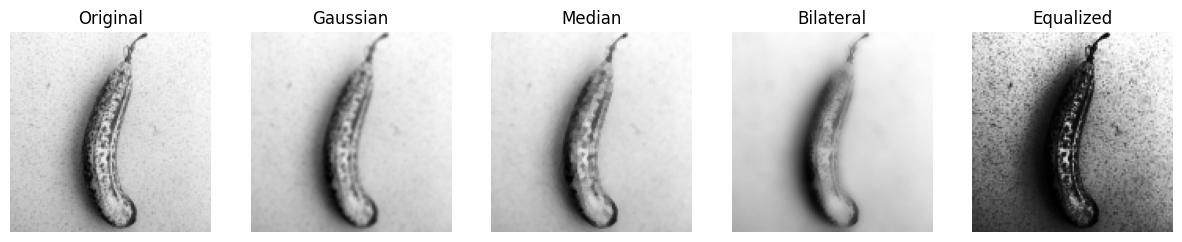

In [ ]:

# Read a sample image
img = cv2.imread('/content/drive/MyDrive/archive_copy/Bad Quality_Fruits/Banana_Bad/IMG_20190910_175218_1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply different filters
gaussian = cv2.GaussianBlur(img, (3, 3), 0)
median = cv2.medianBlur(img, 3)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
equalized = cv2.equalizeHist(img)

# Display comparison
titles = ['Original', 'Gaussian', 'Median', 'Bilateral', 'Equalized']
images = [img, gaussian, median, bilateral, equalized]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


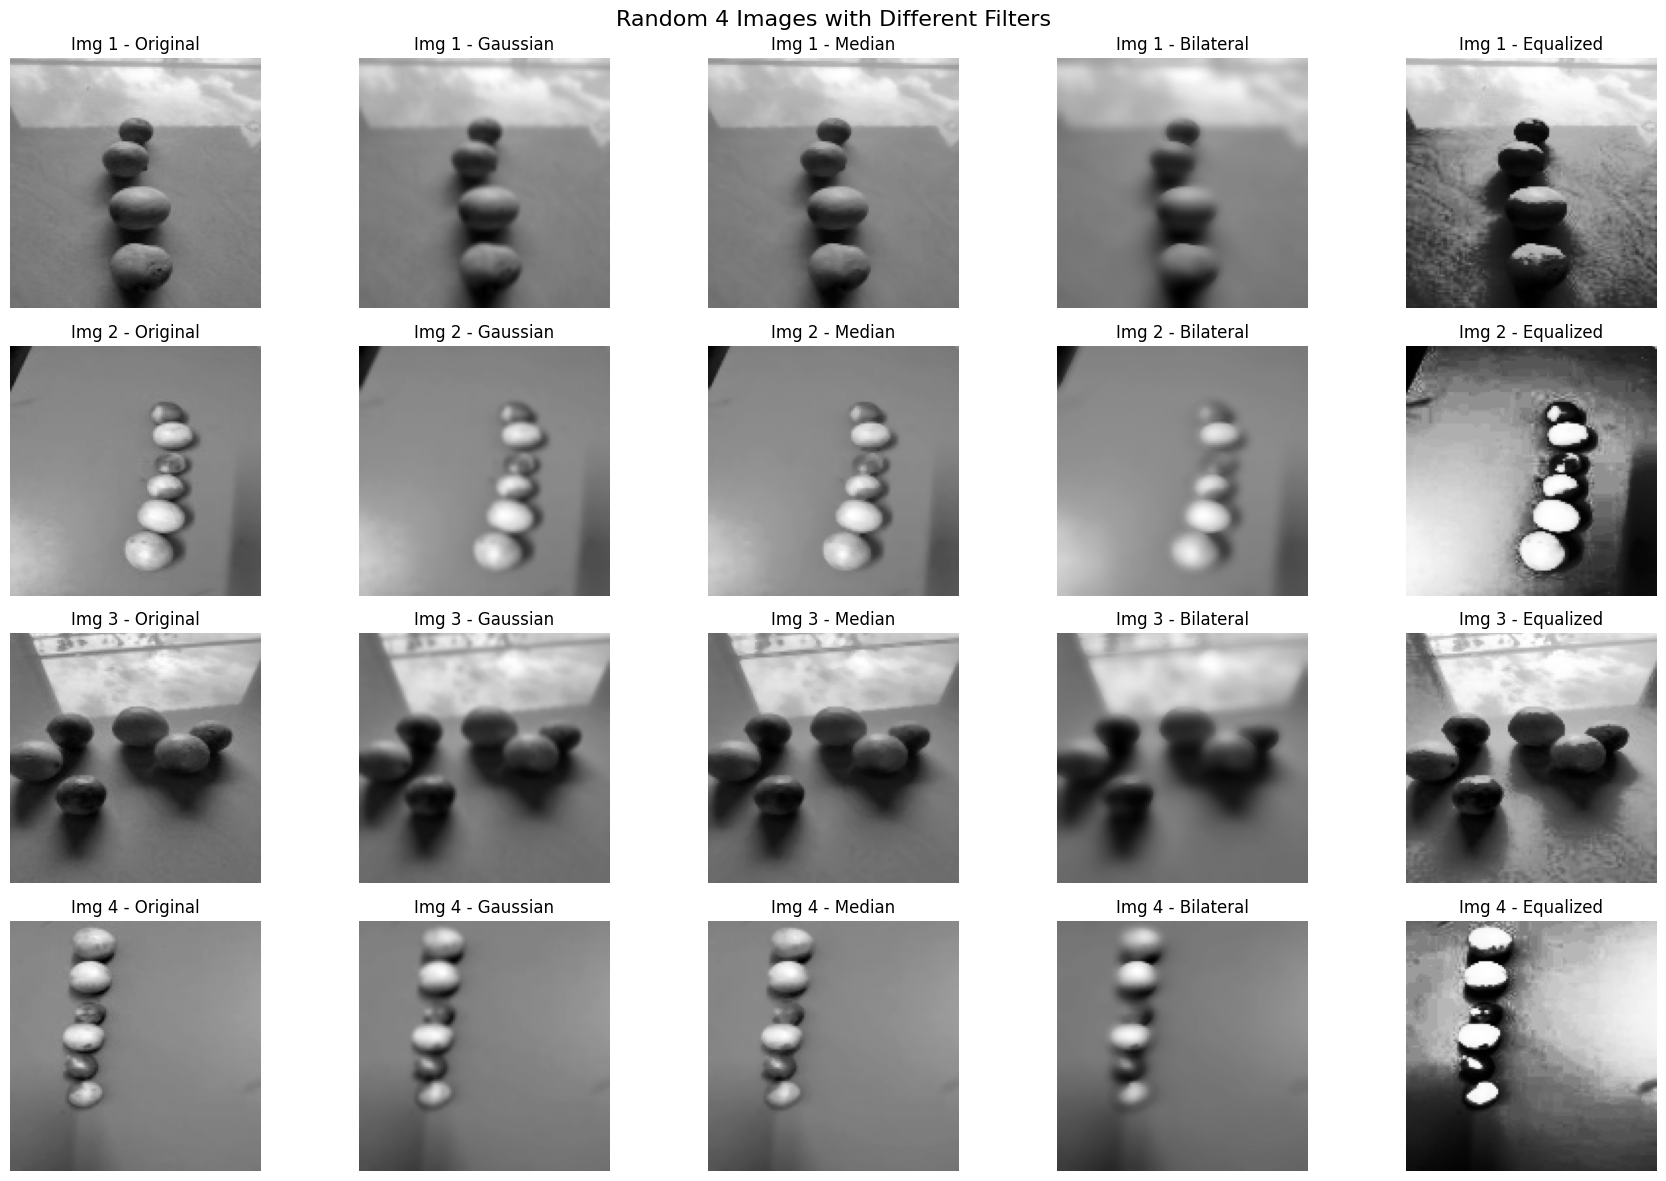

In [ ]:

# Path to your folder (choose one category)
folder = r'/content/drive/MyDrive/archive_copy/Mixed Qualit_Fruits/Lemon'

# Get all image paths
images = [os.path.join(folder, f) for f in os.listdir(folder)
           if f.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif'))]

# Select 4 random images
sample_images = random.sample(images, 4)

# Filters to apply
filter_names = ['Original', 'Gaussian', 'Median', 'Bilateral', 'Equalized']

# Create figure
plt.figure(figsize=(18, 12))

# Loop through 4 images
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Apply filters
    gaussian = cv2.GaussianBlur(img, (3, 5), 0)
    median = cv2.medianBlur(img, 3)
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    equalized = cv2.equalizeHist(img)

    filtered_images = [img, gaussian, median, bilateral, equalized]

    # Show all filters for this image in a row
    for j, (name, fimg) in enumerate(zip(filter_names, filtered_images)):
        plt.subplot(4, 5, i * 5 + j + 1)
        plt.imshow(fimg, cmap='gray')
        plt.title(f"Img {i+1} - {name}")
        plt.axis('off')

plt.suptitle("Random 4 Images with Different Filters", fontsize=16)
plt.tight_layout()
plt.show()


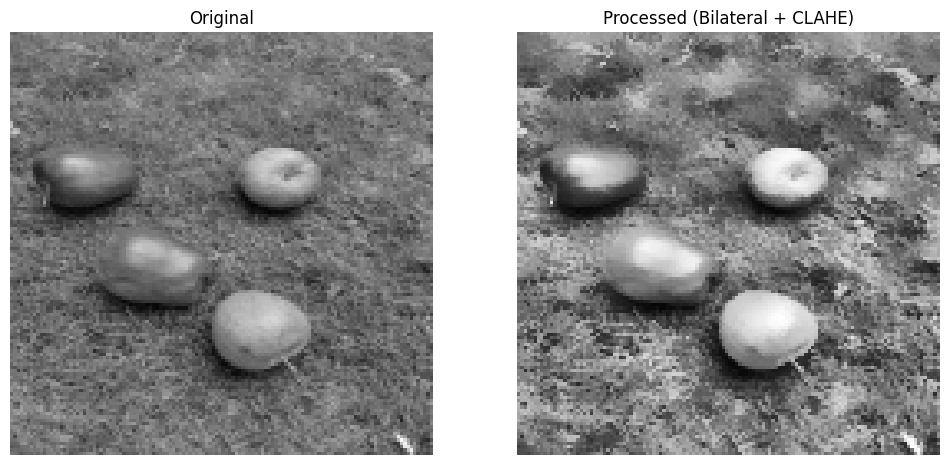

In [ ]:

import matplotlib.pyplot as plt


img_path = "/content/drive/MyDrive/archive_copy/Mixed Qualit_Fruits/Apple/IMG20200728130327.jpg"


img = cv2.imread(img_path)


bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=25, sigmaSpace=25)


lab = cv2.cvtColor(bilateral, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)


clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6,6))
cl = clahe.apply(l)


limg = cv2.merge((cl, a, b))
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.title("Processed (Bilateral + CLAHE)")
plt.axis('off')
plt.show()



Bilateral + CLAHE

In [ ]:
import cv2
import os


train_folder = r'/content/drive/MyDrive/archive_copy'

# CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6,6))


processed_count = 0

for root, dirs, files in os.walk(train_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
            img_path = os.path.join(root, file)
            try:
                img = cv2.imread(img_path)
                if img is None:
                    print(f"⚠️ Could not read {img_path}, skipping.")
                    continue

                # 1️⃣ Bilateral Filter
                bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=25, sigmaSpace=25)


                lab = cv2.cvtColor(bilateral, cv2.COLOR_BGR2LAB)
                l, a, b = cv2.split(lab)


                cl = clahe.apply(l)


                limg = cv2.merge((cl, a, b))
                final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)


                cv2.imwrite(img_path, final)
                processed_count += 1

            except Exception as e:
                print(f"⚠️ Error processing {img_path}: {e}")

print(f"✅ Done! Processed {processed_count} images.")


⚠️ Could not read /content/drive/MyDrive/archive_copy/Bad Quality_Fruits/Banana_Bad/IMG_20190910_175631_1.jpg, skipping.
⚠️ Could not read /content/drive/MyDrive/archive_copy/Good Quality_Fruits/Banana_Good/IMG_8879.JPG, skipping.
✅ Done! Processed 14529 images.
